IMPORTS

In [1]:
from main import *
from neural_network import *
import time
import json
from dataset import Dataset
from rise_and_fall import *
from IPython.display import clear_output
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt
import scipy as sci
np.set_printoptions(precision=3, linewidth=2*75, suppress=False)
import os
import glob

PLOT FUNTIONS

In [ ]:
def plot_frame(f: pd.DataFrame, mxis=[], mnis=[], mark=None):
    ps = f["meanp"].to_numpy()
    mn = ps.min()
    mx = ps.max()
    plt.plot(ps)
    if len(mxis) > 0:
        plt.vlines(x=mxis, ymin=mn, ymax=mx, colors='green',)
    elif 'mxis' in f.columns:
        plt.vlines(x=f.index[f['mxis'] > 0], ymin=mn, ymax=mx, colors='green',)
    if len(mnis) > 0:
        plt.vlines(x=mnis, ymin=mn, ymax=mx, colors='red',)
    elif 'mnis' in f.columns:
        plt.vlines(x=f.index[f['mnis'] > 0], ymin=mn, ymax=mx, colors='red',)
    if mark is not None:
        plt.vlines(x=[mark], ymin=mn, ymax=mx, colors='blue',)
    plt.show()


def unique(xs):
    ys = []
    for x in xs:
        if x in ys:
            continue
        ys.append(x)
    return ys


INDICES CREATION FOR TRAINING VALIDATION AND TESTING

In [ ]:
# with open('database/channels.json') as file:
#     symbols = json.load(file)

# indices = []
# for symbol in symbols:
#     df = pd.read_csv(f"database/{symbol}.csv")
#     limit = df.shape[0]-1000
#     low = 1000
#     s,v = (int(limit*frac) for frac in [5/100, 10/100])
#     r = limit-s-v
#     s_ = np.random.randint(low, limit, size=s)

#     v_ = np.random.randint(low, limit, size=v)
#     similarity = np.isin(v_, s_)
#     while np.any(similarity):
#         v_[similarity] = np.random.randint(low, limit, v_[similarity].shape[0])
#         similarity = np.isin(v_, s_)
    
#     r_ = np.random.randint(low, limit, size=r)
#     similarity = np.isin(r_, np.append(v_, s_))
#     while np.any(similarity):
#         r_[similarity] = np.random.randint(low, limit, r_[similarity].shape[0])
#         similarity = np.isin(r_, np.append(v_, s_))
    
#     indices.append(
#         {
#             'symbol': symbol,
#             'r': r_,
#             's': s_,
#             'v': v_
#         }
#     )

# np.savez_compressed('database/indices.npz', indices=indices)

SAVING DATASETS IN NPY

In [ ]:
with open('database/channels.json') as file:
    symbols = json.load(file)

def save_set(x1, itter, symbol, sc):
    np.save(f'database/{symbol}/{sc}x1.npy', x1)
    x2, y1, y2, y3, y4 = itter
    np.save(f'database/{symbol}/{sc}x2.npy', x2)
    np.save(f'database/{symbol}/{sc}y1.npy', y1)
    np.save(f'database/{symbol}/{sc}y2.npy', y2)
    np.save(f'database/{symbol}/{sc}y3.npy', y3)
    np.save(f'database/{symbol}/{sc}y4.npy', y4)

dataset_size = 350000
trx1 = []; trothers = []
vlx1 = []; vlothers = []
tsx1 = []; tsothers = []

if __name__ == '__main__':
    for symbol in symbols:
        if symbol in [r.split('\\')[-1] for r in glob.glob('database/*') if '.' not in r]:
            continue
        print(symbol, ' started')
        db = Dataset(symbol)
        x1, others = db.get_data_set(
            batch_size=dataset_size, max_procs=4, single_process_size=int(dataset_size/4), buy=True, validation=False, test=False)

        norm = x1.max(axis=(0,1))
        norm[-1] = 288.0
        if not os.path.isdir(f'database/{symbol}'):
            os.mkdir(f'database/{symbol}')
        np.save(f'database/{symbol}/norm.npy', norm)
        save_set(x1, others, symbol, 'tr')

        time.sleep(3*60)

        x1, others = db.get_data_set(
            batch_size=2**12, max_procs=8, single_process_size=512, buy=True, validation=True, test=False)
        save_set(x1, others, symbol, 'vl')

        x1, others = db.get_data_set(
            batch_size=2**12, max_procs=8, single_process_size=512, buy=True, validation=False, test=True)
        save_set(x1, others, symbol, 'ts')

        time.sleep(5*60)
        

MODEL TESTING

ADAUSDT
[3.094e+00 1.877e-01 3.626e+01 3.094e+00 1.484e-01 1.000e+00 1.000e+00 5.730e+08 7.610e+05 2.880e+02]
[1.    1.    1.    0.996 1.    1.    0.994 0.72  0.701 5.26 ] 
 [0.168 0.007 0.019 0.168 0.014 0.505 0.495 0.01  0.011 0.196] 
 [0.006 0.    0.    0.007 0.    0.    0.    0.    0.    0.017]
2015.0 1007.740234375 0.0
1.8402777777777777 0.11077033148871529 0.017361111111111112
0.9592760180995474 0.1666789313663416 0.007454751131221719
05277001 selected
Retrived Trained Model


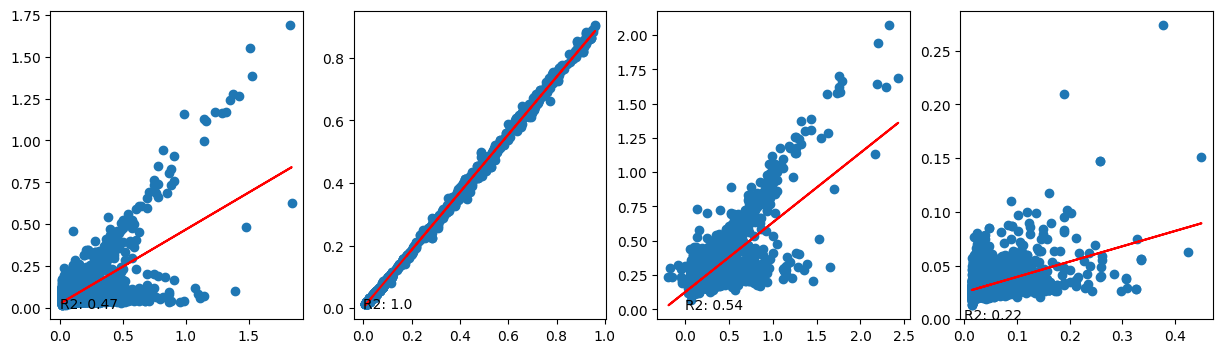

BNBUSDT
[6.882e+02 3.403e+01 3.686e+01 6.877e+02 2.499e+01 1.000e+00 1.000e+00 6.677e+08 8.417e+05 2.880e+02]
[ 1.     0.933  1.     0.999  0.856  1.     1.     0.87   0.836 12.569] 
 [0.194 0.008 0.018 0.194 0.018 0.518 0.479 0.013 0.014 0.224] 
 [0.002 0.    0.    0.002 0.    0.    0.    0.    0.    0.017]
2015.0 998.989404296875 0.0
6.215277777777778 0.12091742621527779 0.017361111111111112
0.9808307057438862 0.19256343434757375 0.0021879949434039027
26470711 selected
Retrived Trained Model


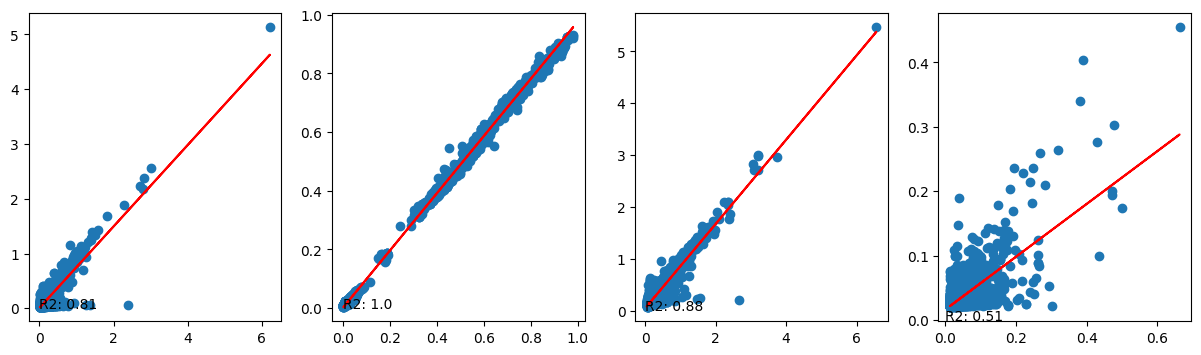

BTCUSDT
[6.871e+04 2.844e+03 2.777e+01 6.871e+04 2.385e+03 1.000e+00 1.000e+00 3.527e+09 2.040e+06 2.880e+02]
[ 1.     1.     1.     0.997  0.956  1.     1.     0.809  0.82  26.823] 
 [0.29  0.013 0.02  0.29  0.025 0.503 0.495 0.017 0.022 0.336] 
 [0.042 0.    0.    0.042 0.    0.    0.    0.    0.    0.017]
2015.0 1000.76201171875 0.0
5.451388888888889 0.17466227213541669 0.017361111111111112
0.9861671900512403 0.2894724015598183 0.04603614371861553
66106124 selected
Retrived Trained Model


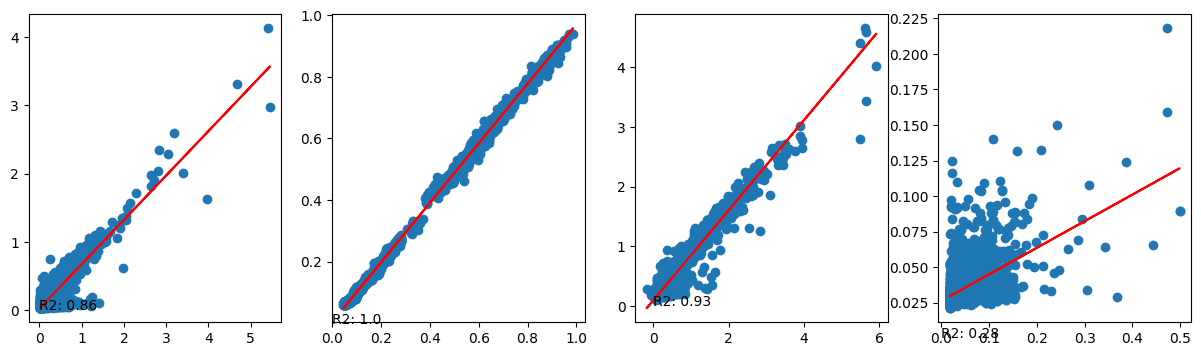

DOGEUSDT
[7.329e-01 5.511e-02 8.391e+01 7.329e-01 3.542e-02 1.000e+00 1.000e+00 1.936e+09 1.594e+06 2.880e+02]
[1.    1.    1.    0.999 1.    1.    1.    1.    1.    9.514] 
 [0.128 0.006 0.008 0.128 0.012 0.482 0.469 0.004 0.007 0.205] 
 [0.002 0.    0.    0.002 0.    0.    0.    0.    0.    0.017]
2015.0 989.38916015625 0.0
2.8645833333333335 0.11619991726345487 0.017361111111111112
0.9853765362823588 0.12689910921046682 0.0019428023700449242
04346628 selected
Retrived Trained Model


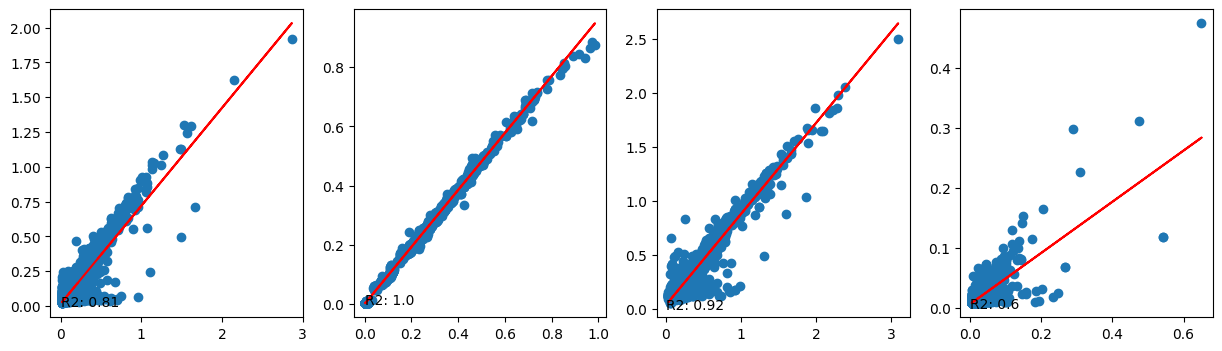

ETHUSDT
[4.856e+03 2.202e+02 3.708e+01 4.856e+03 1.550e+02 1.000e+00 1.000e+00 1.404e+09 8.064e+05 2.880e+02]
[1.    1.    1.    0.997 1.004 1.    1.    0.95  0.815 6.979] 
 [0.22  0.01  0.016 0.22  0.023 0.504 0.494 0.019 0.025 0.246] 
 [0.017 0.    0.    0.017 0.    0.    0.    0.    0.    0.017]
2015.0 1019.97978515625 0.0
2.7604166666666665 0.13371785481770831 0.017361111111111112
0.9842829511540542 0.21986943559376917 0.017496279112629496
35195448 selected
Retrived Trained Model


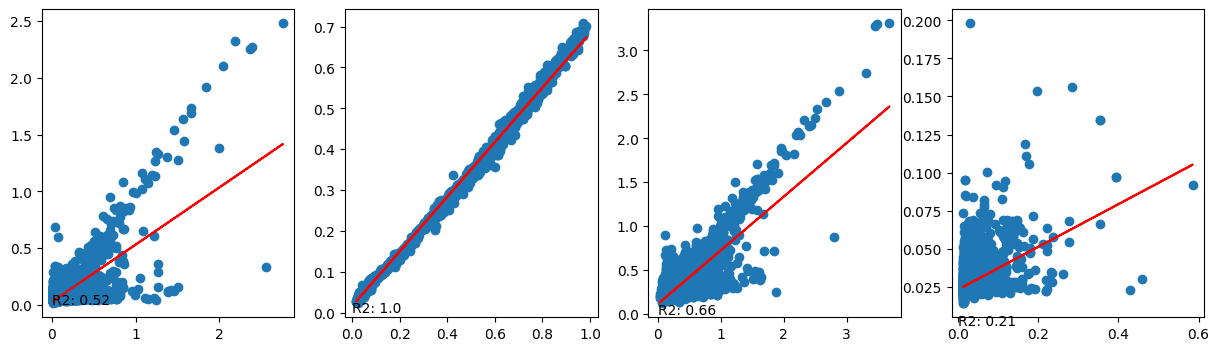

LINKUSDT
[5.275e+01 2.427e+00 5.780e+01 5.262e+01 2.221e+00 1.000e+00 1.000e+00 1.613e+08 3.532e+05 2.880e+02]
[1.    1.    1.    0.994 1.    1.    1.    1.    0.825 4.028] 
 [0.232 0.014 0.013 0.233 0.023 0.488 0.501 0.019 0.015 0.168] 
 [0.007 0.    0.    0.007 0.    0.    0.    0.    0.    0.017]
2015.0 1014.51611328125 0.0
1.5798611111111112 0.09219275580512154 0.017361111111111112
0.9831976983927616 0.23095848001157082 0.006828038277965524
26022733 selected
Retrived Trained Model


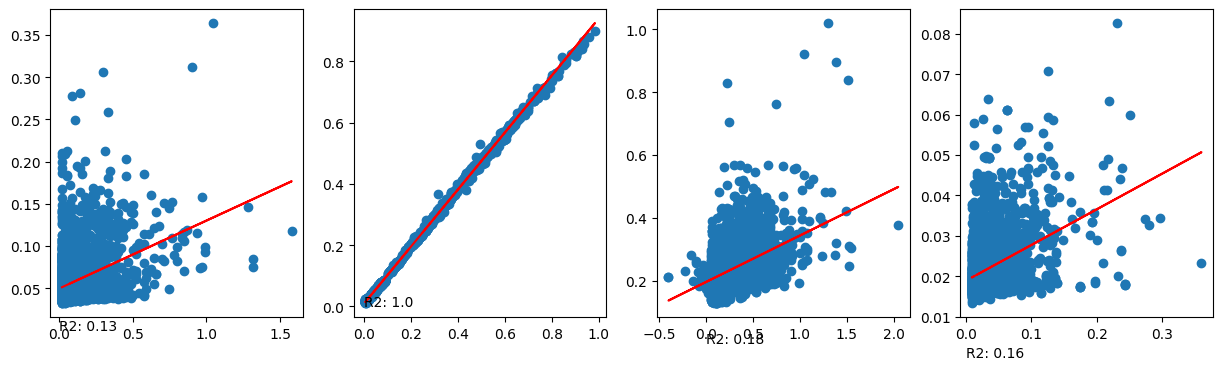

LTCUSDT
[4.111e+02 1.797e+01 3.368e+01 4.111e+02 2.522e+01 1.000e+00 1.000e+00 6.612e+08 7.382e+05 2.880e+02]
[1.    0.9   1.    0.999 1.    0.989 1.    0.676 0.563 9.844] 
 [0.255 0.015 0.019 0.255 0.016 0.506 0.494 0.004 0.007 0.22 ] 
 [5.494e-02 0.000e+00 0.000e+00 5.517e-02 0.000e+00 0.000e+00 1.149e-02 4.551e-07 4.064e-06 1.736e-02]
2015.0 1019.44560546875 1.0
2.7083333333333335 0.12343088785807294 0.017361111111111112
0.9650567387100306 0.25308186598539417 0.05618530996484998
72500215 selected
Retrived Trained Model


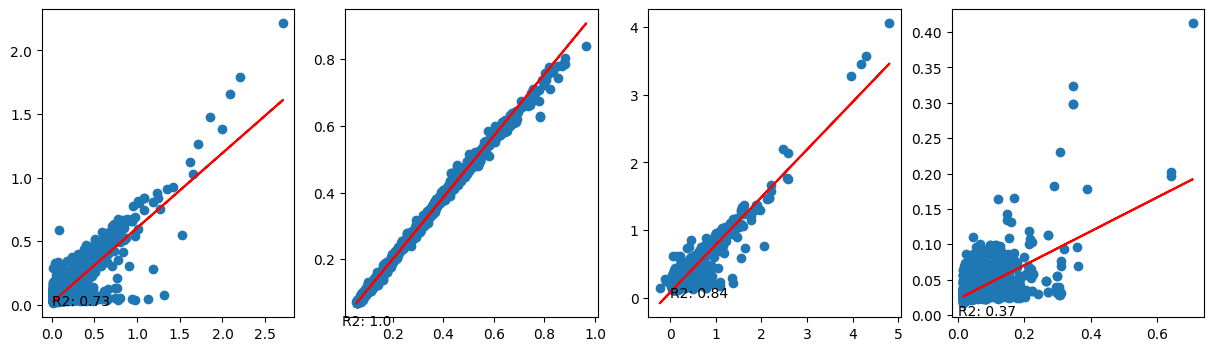

SHIBUSDT
[8.793e-05 3.853e-06 4.664e+01 8.793e-05 3.622e-06 8.975e-01 8.658e-01 9.171e+08 1.404e+06 2.880e+02]
[1.    1.    1.    0.994 1.    0.989 0.937 1.    1.    4.288] 
 [0.242 0.019 0.017 0.242 0.027 0.562 0.572 0.012 0.014 0.165] 
 [6.122e-02 1.298e-03 0.000e+00 6.257e-02 0.000e+00 2.101e-01 1.296e-01 3.328e-05 8.619e-05 1.736e-02]
2015.0 1012.16845703125 0.0
1.7881944444444444 0.09023454454210071 0.017361111111111112
0.8809496730167755 0.23868026060918396 0.0623258458913847
96201155 selected
Retrived Trained Model


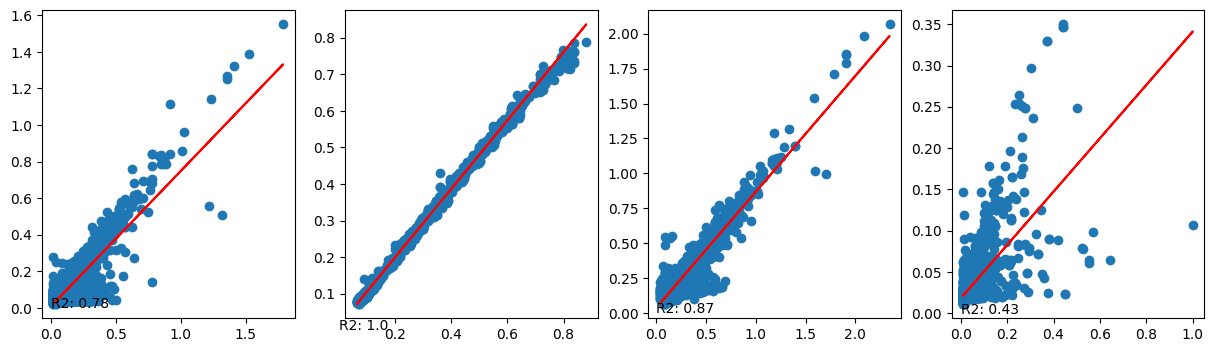

SOLUSDT
[2.593e+02 1.182e+01 4.012e+01 2.591e+02 9.655e+00 1.000e+00 1.000e+00 5.867e+08 9.125e+05 2.880e+02]
[1.    1.    1.    0.996 1.    1.    1.    1.    1.    2.865] 
 [0.253 0.015 0.021 0.254 0.029 0.494 0.505 0.012 0.013 0.156] 
 [0.004 0.    0.    0.005 0.    0.    0.    0.    0.    0.017]
2015.0 1020.676025390625 0.0
1.6319444444444444 0.08341471354166669 0.017361111111111112
0.9892599591222859 0.25172789774142945 0.00419276155952335
80999824 selected
Retrived Trained Model


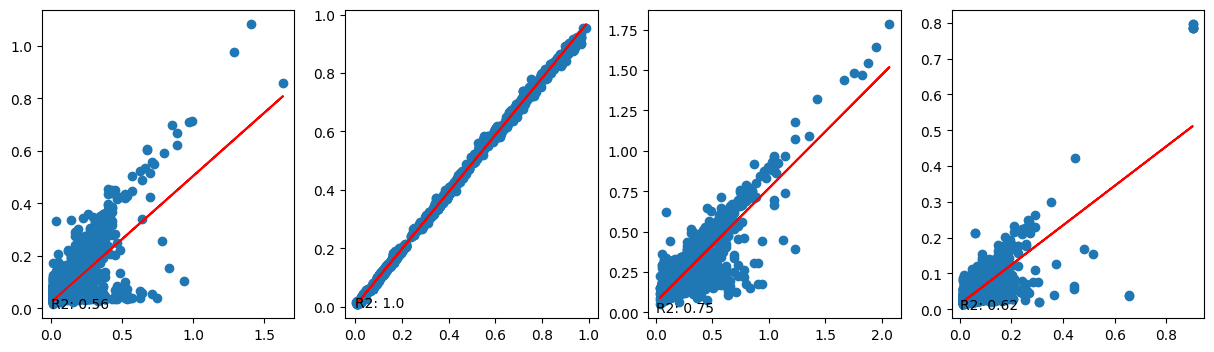

TRXUSDT
[1.781e-01 8.678e-03 3.673e+01 1.781e-01 7.204e-03 1.000e+00 1.000e+00 2.594e+08 3.202e+05 2.880e+02]
[1.    1.    1.    0.978 1.    0.996 0.986 0.656 1.    5.781] 
 [0.236 0.01  0.017 0.236 0.021 0.533 0.466 0.011 0.016 0.222] 
 [0.048 0.    0.    0.049 0.    0.    0.    0.    0.    0.017]
2015.0 994.1943359375 0.0
3.0902777777777777 0.11476304796006945 0.017361111111111112
0.9186993010918686 0.23499434228582783 0.0529233446543352
57324030 selected
Retrived Trained Model


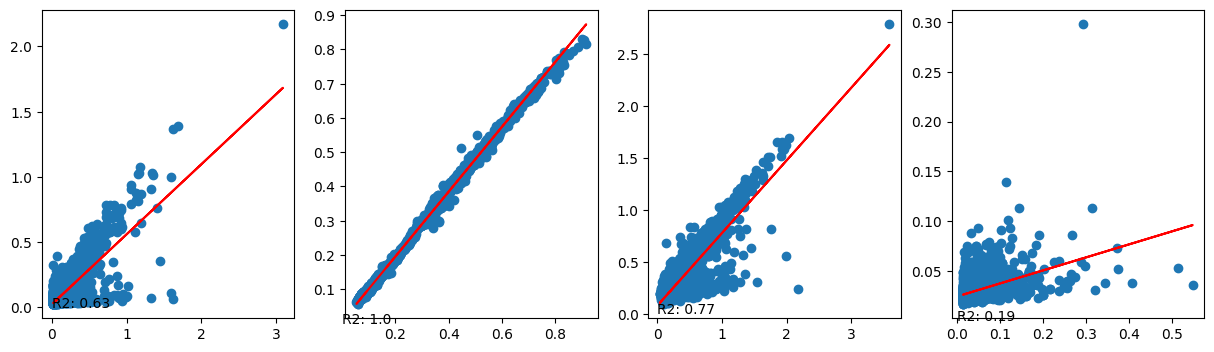

XRPUSDT
[1.958e+00 9.468e-02 4.382e+01 1.958e+00 8.116e-02 1.000e+00 1.000e+00 4.496e+08 8.154e+05 2.880e+02]
[1.    1.    1.    0.99  1.    0.994 0.997 1.    0.696 8.264] 
 [0.257 0.013 0.014 0.257 0.023 0.509 0.491 0.017 0.013 0.245] 
 [5.527e-02 0.000e+00 0.000e+00 5.934e-02 0.000e+00 2.771e-03 6.001e-03 5.357e-06 1.962e-05 1.736e-02]
2015.0 1013.827392578125 0.0
2.4131944444444446 0.1368628607855903 0.017361111111111112
0.8866707020554944 0.2547834875791075 0.07180438069551713
62306239 selected
Retrived Trained Model


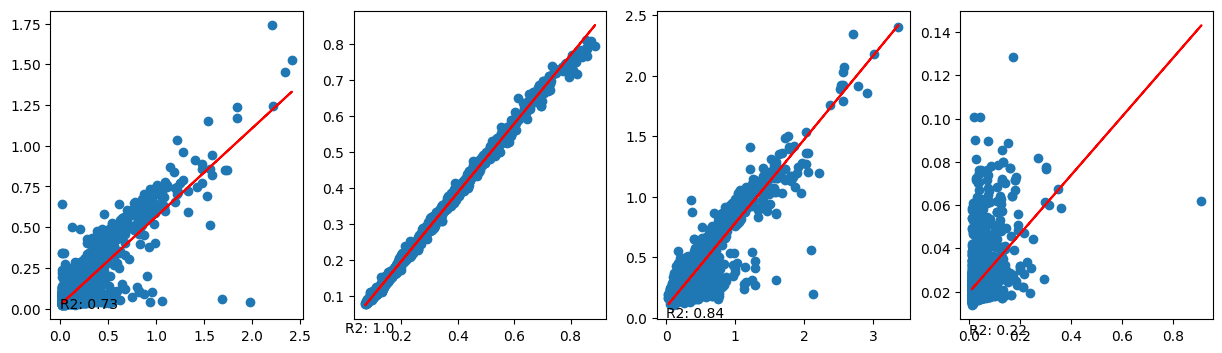

In [2]:
def test(symbol, data, show=True):
    model = get_bp_model(symbol, 3e-4, allow_base=False)
    yp = model.predict(data[:2], batch_size=1024, verbose=0)
    ya = data[2:]  # [y[i] for i in range(y.shape[0])]
    plt.figure(figsize=(15, 4))
    for i in range(4):
        slope, intercept, r_value, p_value, std_err = sci.stats.linregress(ya[i], yp[i].flatten())
        plt.subplot(1, len(ya), i+1)
        plt.plot(ya[i], slope*ya[i]+intercept, c='r')
        plt.text(0.0, 0.0, f'R2: {np.round(r_value**2, 2)}')
        plt.scatter(ya[i], yp[i])
    if show:
        plt.show()
    else:
        return r_value**2

for sym in [r.split('\\')[-1] for r in glob.glob('database/*') if '.' not in r]:
    print(sym)
    _,_,s = normalized_data(sym)
    print(np.load(f'database/{sym}/norm.npy'))
    print(s[0].max(axis=(0,1)),'\n', s[0].mean(axis=(0,1)),'\n', s[0].min(axis=(0,1)))
    for i in range(1,4):
        print(s[i].max(), s[i].mean(), s[i].min())
    test(sym, s)

RANDOM

In [ ]:
model = buy_predictor()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model.summary()
